**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
library(pheatmap)
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

**Read total ATAC peaks**

In [8]:
### set file path
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.fcc.total.tsv"
fpath = file.path(fdiry, fname)

### read table
dat = read_tsv(fpath, show_col_types = FALSE)

### assign and show
dat_peak_atac_total = dat
print(dim(dat))
head(dat)

[1] 732434      7


Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,-0.01311792,ASTARR,ASTARR_T
chr1,100010437,100010915,chr1:100010437-100010915,-0.80687947,ASTARR,ASTARR_T
chr1,10002087,10003910,chr1:10002087-10003910,-0.34892859,ASTARR,ASTARR_T
chr1,100021298,100021629,chr1:100021298-100021629,-1.03799571,ASTARR,ASTARR_T
chr1,100023727,100023976,chr1:100023727-100023976,-0.19100207,ASTARR,ASTARR_T
chr1,100027983,100029702,chr1:100027983-100029702,-0.18001582,ASTARR,ASTARR_T


In [9]:
### set file path
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.fcc.active.tsv"
fpath = file.path(fdiry, fname)

### read table
dat = read_tsv(fpath, show_col_types = FALSE)

### assign and show
dat_peak_fcc_total = dat
print(dim(dat))
head(dat)

[1] 167127      6


Chrom,Start,End,Peak,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,101198203,101199537,chr1:101198203-101199537,ASTARR,ASTARR_AB
chr1,1012902,1014502,chr1:1012902-1014502,ASTARR,ASTARR_AB
chr1,109213422,109215054,chr1:109213422-109215054,ASTARR,ASTARR_AB
chr1,109218538,109219133,chr1:109218538-109219133,ASTARR,ASTARR_AB
chr1,109388963,109390708,chr1:109388963-109390708,ASTARR,ASTARR_AB
chr1,109476546,109477209,chr1:109476546-109477209,ASTARR,ASTARR_AB


## Calculate similarity

In [12]:
dat = dat_peak_fcc_total
lst = split(dat$Peak, dat$Assay_Type)

lst_vec_txt_peak_active = lst
table(dat$Assay_Type)


               ASTARR        CRISPRi-Growth         CRISPRi-HCRFF 
                21597                  4609                    54 
 ENCODE-E2G_Benchmark ENCODE-E2G_Prediction                 LMPRA 
                  353                 35672                 55312 
                TMPRA                WSTARR 
                 1093                 48437 

In [13]:
dat = dat_peak_atac_total
lst = split(dat$Peak, dat$Assay_Type)

lst_vec_txt_peak_total = lst
table(dat$Assay_Type)


               ASTARR        CRISPRi-Growth         CRISPRi-HCRFF 
               246850                 80288                  1330 
 ENCODE-E2G_Benchmark ENCODE-E2G_Prediction                 LMPRA 
                 3007                 84129                 68420 
                TMPRA                WSTARR 
                 1722                246688 

In [33]:
fun_jaccard = function(
    txt_assay1, 
    txt_assay2, 
    lst_active = lst_vec_txt_peak_active, 
    lst_total  = lst_vec_txt_peak_total){

    ### get the regions that are screened commonly
    vec_txt_peak_total_assay1    = unique(lst_total[[txt_assay1]])
    vec_txt_peak_total_assay2    = unique(lst_total[[txt_assay2]])
    vec_txt_peak_total_intersect = intersect(
        vec_txt_peak_total_assay1, 
        vec_txt_peak_total_assay2
    )

    ### get the regions that are being called in both assay
    vec_txt_peak_active_assay1    = unique(lst_active[[txt_assay1]])
    vec_txt_peak_active_assay2    = unique(lst_active[[txt_assay2]])
    
    vec_txt_peak_active_intersect = intersect(
        vec_txt_peak_active_assay1, 
        vec_txt_peak_active_assay2
    )
    
    vec_txt_peak_active_union = union(
        vec_txt_peak_active_assay1, 
        vec_txt_peak_active_assay2
    )

    ### 
    idx1 = c(vec_txt_peak_active_intersect %in% vec_txt_peak_total_intersect)
    idx2 = c(vec_txt_peak_active_union     %in% vec_txt_peak_total_intersect)
    vec1 = vec_txt_peak_active_intersect[idx1]
    vec2 = vec_txt_peak_active_union[idx2]
    
    ### results
    num = length(vec1) / length(vec2)
    res = list(
        "Assay1"     = txt_assay1, 
        "Assay2"     = txt_assay2, 
        "Similarity" = num
    )
    return(res)
}

In [34]:
lst = lst_vec_txt_peak_total
vec = names(lst)
idx = str_detect(vec, "ENCODE")
vec = vec[!idx]
vec

[1] "ASTARR"         "CRISPRi-Growth" "CRISPRi-HCRFF"  "LMPRA"         
[5] "TMPRA"          "WSTARR"

In [35]:
###
lst = lst_vec_txt_peak_total
vec = names(lst)
idx = str_detect(vec, "ENCODE")
vec = vec[!idx]

###
dat = expand.grid(vec, vec) #%>% t %>% as.data.frame
lst = apply(dat, 1, function(vec){
    txt1 = vec[1]
    txt2 = vec[2]
    res  = fun_jaccard(txt1, txt2)
    return(res)
})
dat = bind_rows(lst)

### assign and show
dat_summary = dat
print(dim(dat))
head(dat)

[1] 36  3


Assay1,Assay2,Similarity
<chr>,<chr>,<dbl>
ASTARR,ASTARR,1.00000000
CRISPRi-Growth,ASTARR,0.06575554
CRISPRi-HCRFF,ASTARR,0.15337423
LMPRA,ASTARR,0.24631779
TMPRA,ASTARR,0.15642458
WSTARR,ASTARR,0.24727448


In [36]:
dat = dat_summary
dat = dat %>% 
    dplyr::mutate(Value = Similarity) %>% 
    dplyr::select(Assay1, Assay2, Value)

mat = dat %>% 
    tidyr::spread(Assay2, Value) %>% 
    column_to_rownames("Assay1") %>% 
    as.matrix

mat_score_pairwise = mat
mat

,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR
ASTARR,1.00000000,0.06575554,0.15337423,0.24631779,0.15642458,0.24727448
CRISPRi-Growth,0.06575554,1.00000000,0.24637681,0.06914968,0.06732348,0.08093078
CRISPRi-HCRFF,0.15337423,0.24637681,1.00000000,0.10227273,0.05405405,0.10358566
LMPRA,0.24631779,0.06914968,0.10227273,1.00000000,0.35853379,0.36892763
TMPRA,0.15642458,0.06732348,0.05405405,0.35853379,1.00000000,0.24109589
WSTARR,0.24727448,0.08093078,0.10358566,0.36892763,0.24109589,1.00000000


In [38]:
mat = mat_score_pairwise

paletteLength <- 50
#myColor <- colorRampPalette(c("#abd9e9", "white", "#d73027"))(paletteLength)
#myBreaks <- c(seq(-0.1, 0, length.out=ceiling(paletteLength/2) + 1), 
#              seq(1/paletteLength, 1, length.out=floor(paletteLength/2)))

num      = 1
myColor  = colorRampPalette(c("white", "#d73027"))(paletteLength)
myBreaks = seq(0, num, length.out=paletteLength)

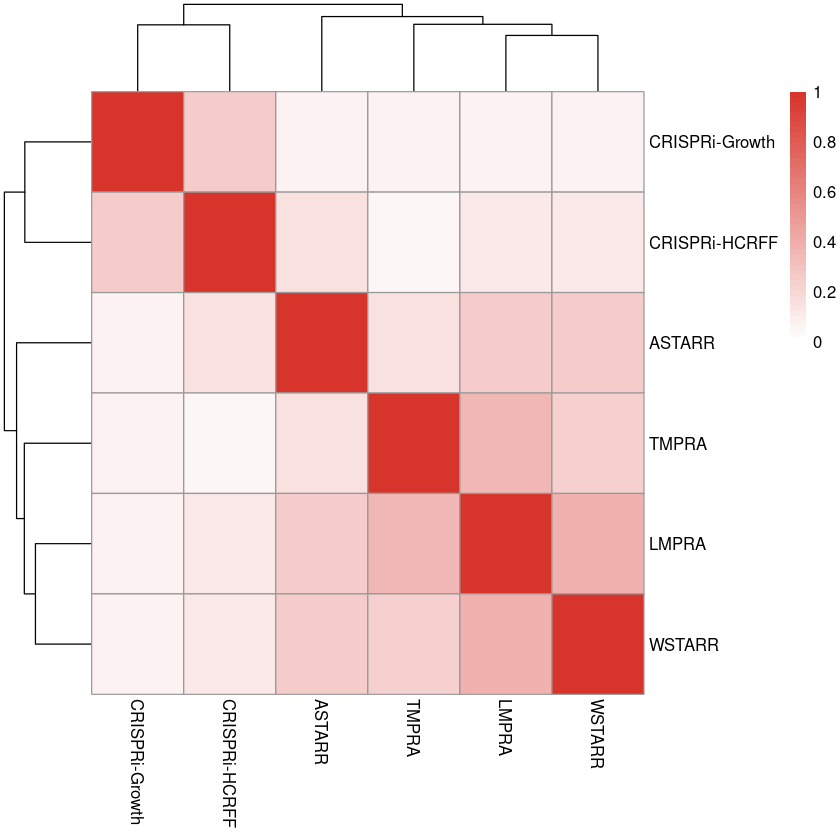

In [39]:
mat = mat_score_pairwise
pheatmap(
    mat,
    color=myColor, 
    breaks=myBreaks
)